In [20]:
import networkx as nx
import matplotlib 
import random
import matplotlib.pyplot as plt


In [21]:
ProfilTypes= {"classique":0.39,"marginal":0.3,"vieux":0.1,"geek":0.2,"media":0.01}
def listprofil(probaprofil,n):
    """dict[str:int]*int->list[str]
    renvoie une liste de n personnes avec leur profil"""
    LR=[]
    #nbr={"classique":round(n*probaprofil["classique"]),
       #  "marginal":round(n*probaprofil["marginal"]),
        #"vieux":round(n*probaprofil["vieux"]),
        #"geek":round(n*probaprofil["geek"]),
        #"media":round(n*probaprofil["media"])}
    nbr=[]
    for i in probaprofil.keys():
        nbr=nbr+[i for n in range(round(n*probaprofil[i]))]
    for i in range(n):
        a=random.choice(nbr)
        LR.append(a)
        nbr.remove(a)
        
    if ("media" in LR) == False:
        LR.remove("classique")
        LR.append("media")
      
    return LR

def indice_media(listprofils):
    """renvoie liste indice medias"""
    Li=[]
    for i in range(len(listprofils)):
        if listprofils[i]=="media":
            Li.append(i)
    return Li

listprofils=listprofil(ProfilTypes,30)
print(listprofils)
print(indice_media(listprofils))

['classique', 'classique', 'classique', 'vieux', 'marginal', 'marginal', 'marginal', 'marginal', 'classique', 'geek', 'geek', 'classique', 'classique', 'marginal', 'vieux', 'marginal', 'geek', 'geek', 'classique', 'classique', 'marginal', 'classique', 'classique', 'marginal', 'vieux', 'geek', 'marginal', 'classique', 'geek', 'media']
[29]


In [22]:
import math
def nbr_amis(personne):
    """list[int]->int
    renvoie le nombre d'amis d'une personne à partir d'une liste de 0 et de 1"""
    nbr=0
    for elt in personne:
        if elt==1:
            nbr+=1
    return nbr

def choisir_amis(no_personne,n,nbr_moy):
    """int*int->list[int]
    renvoie une liste avec les amis choisis d'une personne"""
    LR=[]
    exclusion= [i for i in range(n) if i!=no_personne]
    last=0

    for elt in range(nbr_moy):
        last=random.choice(exclusion)
        LR.append(last)
        exclusion.remove(last)
    
    return LR


In [23]:
Profiltypes= {"classique":0.39,"marginal":0.25,"vieux":0.15,"geek":0.2,"media":0.01}
ProfilSpecs={"classique":(5/50,0.3,0.7,0.3,0),
             "marginal":(2/50,0.1,0.4,0.2,0),
             "vieux":(3/50,0.6,0.9,0.5,0),
             "geek":(7/50,0.7,1,0.4,0),
            "media":(8/50,0.2,1,1,0.8)} #format nom:(proportion d'amis, proba d'envoyer,pba de recevoir,proba d'envoyer la contre-info, proba de contredire l'info)
def simple_graph_generator_profils(listprofils, profilspecs):
    """list[str]*dict[str:tuple[int;int;int]]->list[list[int]]
    renvoie une matrice liaison en tenant compte des différents profils"""
    n=len(listprofils)
    profils=list(profilspecs.keys())
    LR=[[0 for elt in range(n)] for i in range(n)]
    nbr_moy=dict((i,round(n*ProfilSpecs[i][0])) for i in profils) 
    for elt in range(n):
        amis=choisir_amis(elt,n,nbr_moy[listprofils[elt]])
        for elt2 in amis:
            #tolerance=random.randint(0,n*1/10)
            tolerance=0
            if nbr_amis(LR[elt]) <= nbr_moy[listprofils[elt]]+tolerance and \
                nbr_amis(LR[elt2]) <= nbr_moy[listprofils[elt2]]+tolerance:
                LR[elt][elt2]=1
                LR[elt2][elt]=1
    return LR


    
listeprofils=listprofil(Profiltypes,10)

print(listeprofils)
print(simple_graph_generator_profils(listeprofils,ProfilSpecs))



['geek', 'marginal', 'vieux', 'classique', 'marginal', 'geek', 'vieux', 'classique', 'classique', 'media']
[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]


In [24]:
def donneur_info(population,donneur):
    """int*int->list[int]+list[int]
    donne les matrices info et stock_info"""
    info=[0 if i!= donneur else 1 for i in range(population)]
    return info

listeprofils=listprofil(Profiltypes, 50)
donneur=donneur_info(50,listeprofils.index("geek"))
print(donneur)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
ProfilSpecs={"classique":(5/50,0.3,0.7,0.3,0),
             "marginal":(2/50,0.1,0.4,0.2,0),
             "vieux":(3/50,0.6,0.9,0.5,0),
             "geek":(7/50,0.7,1,0.4,0),
            "media":(8/50,0.2,1,1,0.8)}


def passage_info_profils_avant(liaisons,info,stock_info,nbr,profilspecs,listeprofils):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    nbr_new=nbr
    for i in range(len(info)):
        if info[i]==1:
            for a in range(len(liaisons[i])):
                rdm=random.random()
                if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]: #a modifier pour modèle complexe
                    rdm=random.random()
                    if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: #a modifier pour modèle complexe
                        new_info[a]=1
                        nbr_new+=1
                        new_stock_info[a]+=1
                    elif rdm<profilspecs[listeprofils[i]][2]:
                        new_stock_info[a]+=1
                
    return new_info,new_stock_info,nbr_new



In [26]:
ProfilSpecs={"classique":(10/100,0.3,0.7,0.3,0.2),# % d'amis/envoyer/recevoir/recevoir contre-info/proba d'être un connard
             "marginal":(8/100,0.1,0.4,0.2,0.2),
             "vieux":(9/100,0.6,0.9,0.2,0.2),
             "geek":(12/100,0.7,1,0.4,0.2),
            "media":(15/100,0.2,0.8,1,0,0.8)}
def mat_connard(listprofil):
    """-> list[int]
    renvoie la matrice qui indique qui sont les connards"""
    L_connard=[0 for i in range(len(listprofil))]
    for e in range(len(listprofil)):
        rdm=random.random()
        if rdm<ProfilSpecs[listprofil[e]][4]:
            L_connard[e]=1
    return L_connard

listeprofils=listprofil(Profiltypes, 20)
print(listeprofils)
print(mat_connard(listeprofils))
    

['marginal', 'marginal', 'classique', 'classique', 'classique', 'classique', 'vieux', 'marginal', 'classique', 'geek', 'marginal', 'geek', 'marginal', 'classique', 'vieux', 'classique', 'geek', 'geek', 'vieux', 'media']
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
def passage_info_profils_apres(liaisons,info,stock_info,contre_info,stock_contre_info,nbr,nbr_contre,profilspecs,listeprofils):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    new_stock_contre_info=[i for i in stock_contre_info]
    new_contre_info=[0 for i in info]
    new_nbr=nbr
    new_nbr_contre=nbr_contre
    nbr_contre2=0 #correpond aux nb de personnes ayant déjà reçu la FN et qui recoivent la contre info
    connard=mat_connard(listeprofils)
    
    # passer la contre-info       
    for i in range(len(new_contre_info)):              #parcours de chaque personne
        if contre_info[i]==1:                          #si la personne a la contre-info
            for a in range(len(liaisons[i])):          #on parcours les amis de cette personne
                rdm=random.random()
                if stock_info[i]==0:                   #si cette personne n'a pas la FN 
                    if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][3]:
                        rdm=random.random()
                        if new_stock_contre_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: #si l'ami n'a jamais eu la contre info
                            new_contre_info[a]=1
                            new_nbr_contre+=1
                            new_stock_contre_info[a]+=1
                            if stock_info[a]>=1:
                                nbr_contre2+=1
                        elif rdm<profilspecs[listeprofils[i]][2]:        #si l'ami a deja eu la contre info 
                            new_stock_contre_info[a]+=1
                    
                else:                     #si la personne a eu la FN
                    rdm=random.random()
                    if connard[i]==0:
                        if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][3]*1.5:
                            rdm=random.random()
                            if new_stock_contre_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: #si la personne n'a jamais eu la contre info
                                new_contre_info[a]=1
                                new_nbr_contre+=1
                                new_stock_contre_info[a]+=1
                                if stock_info[a]>=1:
                                    nbr_contre2+=1
                            elif rdm<profilspecs[listeprofils[i]][2]:        #si la personne a deja eu la contre info 
                                new_stock_contre_info[a]+=1
                    else:
                        rdm=random.random()
                        if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][3]*0.2:#connard
                            rdm=random.random()
                            if new_stock_contre_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: #si la personne n'a jamais eu la contre info
                                new_contre_info[a]=1
                                new_nbr_contre+=1
                                new_stock_contre_info[a]+=1
                                if stock_info[a]>=1:
                                    nbr_contre2+=1
                            elif rdm<profilspecs[listeprofils[i]][2]:        #si la personne a deja eu la contre info 
                                new_stock_contre_info[a]+=1
                        
    new_nbr=new_nbr-nbr_contre2
                
     # passer la fake news (info)
    for i in range(len(info)): #on parcours chaque personne
        if info[i]==1:
            if stock_contre_info[i]==0:
                for a in range(len(liaisons[i])): #parcours les amis de cette personne
                    rdm=random.random()
                    if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]:
                        rdm=random.random()
                        if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: 
                            if new_stock_contre_info[a]>=1:
                                new_stock_info[a]+=1
                            else:
                                new_stock_info[a]+=1
                                new_info[a]=1
                                new_nbr+=1
                        elif rdm<profilspecs[listeprofils[i]][2]:      #si l'ami a deja recu l'info
                            new_stock_info[a]+=1
            elif stock_contre_info[i]>0:
                if connard[i]:
                    for a in range(len(liaisons[i])): #parcours les amis de cette personne
                        rdm=random.random()
                        if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]:
                            rdm=random.random()
                            if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[a]][2]: 
                                if new_stock_contre_info[a]>=1:
                                    new_stock_info[a]+=1
                                else:
                                    new_stock_info[a]+=1
                                    new_info[a]=1
                                    new_nbr+=1
                            elif rdm<profilspecs[listeprofils[i]][2]:      #si l'ami a deja recu l'info
                                new_stock_info[a]+=1
                
                            
   
    return new_info, new_stock_info, new_contre_info, new_stock_contre_info, new_nbr, new_nbr_contre

    

In [28]:
def verif_stock_info_media(stock_info,indice_media):
    """retourne true si un média a recu la fake news"""
    for i in indice_media:
        if stock_info[i]==1:
            return False
    return True

def passage_info_profils_fake_news_n_generations(liaisons,info,stock_info,nbr,\
                                                 profilspecs,listeprofils,liste_indice_media,n):
    """passe l'information sur n générations avec possibilité de contre info des médias"""
        
    stock_contre_info_temp=[0 for i in stock_info]
    contre_info_temp=[0 for i in info]
    nbr_temp=nbr
    info_temp=[i for i in info]
    stock_info_temp=[i for i in stock_info]
    NBR=[1]
    m=0
    rdm=random.random()
    while verif_stock_info_media(stock_info_temp,liste_indice_media) and m<n:
        temp=passage_info_profils_avant(liaisons,info_temp,stock_info_temp,nbr_temp, profilspecs, listeprofils)
        info_temp=[i for i in temp[0]]
        stock_info_temp=[i for i in temp[1]]
        nbr_temp=temp[2]
        NBR.append(nbr_temp)
        
        m+=1
    
    NBR_contre=[0 for i in NBR]
      
    rdm=random.random()
    c=0
    for e in range(len(liste_indice_media)):
        if rdm<profilspecs["media"][5]:
            stock_contre_info_temp[liste_indice_media[e]]=1
            contre_info_temp[liste_indice_media[e]]=1
            c+=1
    nbr_contre_temp=c      
    if c!=0:
        NBR_contre.append(c)
        for i in range(m,n+1):           #liaisons,info,stock_info,contre_info,stock_contre_info,nbr,nbr_contre,profilspecs,listeprofils
            temp2=passage_info_profils_apres(liaisons,info_temp,stock_info_temp,contre_info_temp,stock_contre_info_temp,nbr_temp,nbr_contre_temp,profilspecs,listeprofils)
            info_temp=temp2[0]
            stock_info_temp=temp2[1]
            contre_info_temp=[i for i in temp2[2]]
            stock_contre_info_temp=[i for i in temp2[3]]
            nbr_temp=temp2[4]       
            nbr_contre_temp=temp2[5]

            NBR.append(nbr_temp)
            NBR_contre.append(nbr_contre_temp)
    else:
        for i in range(m,n+1):
            temp=passage_info_profils_avant(liaisons,info_temp,stock_info_temp,nbr_temp, profilspecs, listeprofils)
            info_temp=[i for i in temp[0]]
            stock_info_temp=[i for i in temp[1]]
            nbr_temp=temp[2]
            NBR.append(nbr_temp)
            NBR_contre.append(0)
    return NBR, NBR_contre




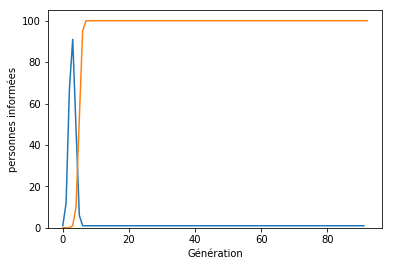

None
([1, 12, 67, 91, 48, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 10, 53, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100])


In [32]:
Profiltypes= {"classique":0.05,"marginal":0.05,"vieux":0.05,"geek":0.85,"media":0.01}
ProfilSpecs={"classique":(10/100,0.3,0.7,0.3,0.2),# % d'amis/envoyer/recevoir/recevoir contre-info/lancer contre-info
             "marginal":(8/100,0.1,0.4,0.1,0.2),
             "vieux":(7/100,0.6,0.9,0.2,0.2),
             "geek":(12/100,0.7,1,0.4,0.2),
            "media":(10/100,0.2,0.8,1,0,1)}

def plot_information(L_FN,L_contre_FN,taille):
    '''
    list[int]-> None
    Visualise l'évolution du opartage de l'information au cours du temps
    '''
    plt.figure()
    plt.plot(L_FN)
    plt.plot(L_contre_FN)
    plt.ylim(0,taille+5)
    plt.ylabel("personnes informées")
    plt.xlabel("Génération")
    plt.show()
    return


listeprofils=listprofil(Profiltypes,100)
#print(listeprofils)
IndiceMedia=indice_media(listeprofils)
#print(IndiceMedia)
generate=simple_graph_generator_profils(listeprofils, ProfilSpecs)
donneur=donneur_info(100,listeprofils.index("geek"))
stock=[i for i in donneur]
final=passage_info_profils_fake_news_n_generations(generate,donneur,stock,1,ProfilSpecs,listeprofils,IndiceMedia,90)
L_FN=final[0]
L_contre_FN=final[1]
taille=100
print(plot_information(L_FN,L_contre_FN,taille))
print(final)


